## Handwritten Digit Recognizer

In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Step 1: Import the dataset
digits_train = pd.read_csv("train.csv")
digits_test = pd.read_csv("test.csv")

In [3]:
# Step 2: Sanity check of data
print(digits_test.shape)
print(digits_train.shape)

(28000, 784)
(42000, 785)


In [124]:
print(digits_train["label"].unique())

[1 0 4 7 3 5 8 9 2 6]


In [52]:
digits_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [5]:
#digits_train.iloc[1:2,1:].as_matrix()[0].reshape(28,28).shape
for i in range(5):print(digits_train.iloc[i:i+1,:1].as_matrix()[0])

[1]
[0]
[1]
[4]
[0]


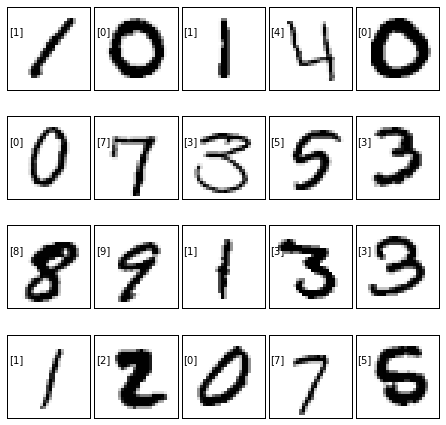

In [6]:
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

##visualize input data
for i in range(20):
    ax = fig.add_subplot(4,5, i + 1, xticks=[], yticks=[])
    ax.imshow((digits_train.iloc[i:i+1,1:].as_matrix()[0]).reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 9, str(digits_train.iloc[i:i+1,:1].as_matrix()[0]))

In [7]:
## Step 3: Visualization
## Dimensionality reduction - PCA
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(digits_train.iloc[:,1:])

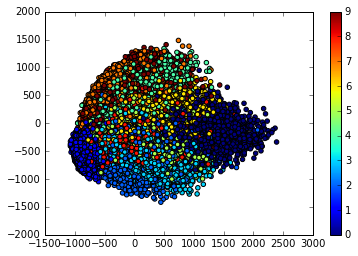

In [8]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits_train.iloc[:,:1])
plt.colorbar()

In [ ]:
## Dimensionality reduction - Manifold
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits_train.iloc[:,1:].as_matrix())

In [ ]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

In [53]:
## Step 4: Split data into Training and testing
## NOTE: We do not require to randomize data as it is already randomized
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(digits_train.iloc[:,1:],digits_train.iloc[:,:1],random_state=0)

In [54]:
## Step 5: Building a classifier
## Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)
print(type(X_train),type(Y_train))
print(X_train.shape,Y_train.shape)

/Users/dhananjaymehta/anaconda/envs/py3k/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(31500, 784) (31500, 1)


In [84]:
# Step 6: Make prediction
print(X_test.shape,type(X_test))
predicted=model.predict(X_test)
expected=Y_test.as_matrix()
expected=expected.flatten()
print(type(predicted),type(expected))
print(predicted.shape)
print(expected.shape)

(10500, 784) <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10500,)
(10500,)


In [122]:
# Step 7 : Check Accuracy of model
matches = (predicted == expected)
print(matches.sum())
print(len(matches))
print(matches.sum()/len(matches))

5935
10500
0.565238095238


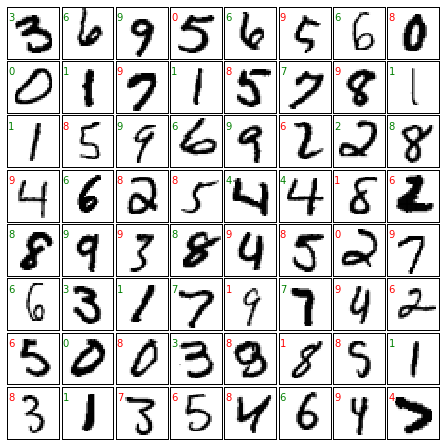

In [88]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.as_matrix().reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [89]:
# Step 8 : Make prediction for test data
prediction_test=model.predict(digits_test)

In [98]:
prediction_test[:20]

array([0, 0, 9, 7, 6, 7, 0, 8, 0, 3, 8, 9, 8, 0, 9, 0, 3, 1, 9, 0])

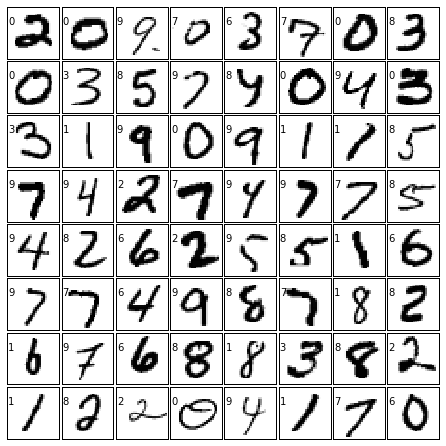

In [105]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits_test.as_matrix().reshape(-1,28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    ax.text(0, 9, str(prediction_test[i]))

In [ ]:
ImageId=[int(i) for i in range(1,len(digits_test)+1)]
ImageId=pd.Series(ImageId)

In [115]:
Submissions=pd.DataFrame({"ImageId":ImageId,"Label":prediction_test})

In [117]:
Submissions.head(5)

,ImageId,Label
0,1,0
1,2,0
2,3,9
3,4,7
4,5,6


In [119]:
Submissions.to_csv("Submissions.csv")